# Hart Disease Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

### About
The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. 
The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

## 1) Problem statement.

* OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications. 
* As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the data given to build a Classification model:**

* This model is to check if Visa get approved or not based on the given dataset.
* This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

## 2) Data Collection.
**Context**
* This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [4]:
df = pd.read_csv(r"heart_disease_uci.csv")

**Show Top 5 Records**

In [5]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Shape of the dataset**

In [6]:
df.shape

(920, 16)

**Summary of the dataset**

In [7]:
# Display summary statistics for a dataframe
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


**Check Datatypes in the dataset**

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


## 3. EXPLORING DATA

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

We have 8 categorical features : ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [10]:
'''now we have to go encoding technique'''
# proportion of count data on categorical columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

sex
Male      78.913043
Female    21.086957
Name: proportion, dtype: float64
---------------------------
dataset
Cleveland        33.043478
Hungary          31.847826
VA Long Beach    21.739130
Switzerland      13.369565
Name: proportion, dtype: float64
---------------------------
cp
asymptomatic       53.913043
non-anginal        22.173913
atypical angina    18.913043
typical angina      5.000000
Name: proportion, dtype: float64
---------------------------
fbs
False    83.373494
True     16.626506
Name: proportion, dtype: float64
---------------------------
restecg
normal              60.021786
lv hypertrophy      20.479303
st-t abnormality    19.498911
Name: proportion, dtype: float64
---------------------------
exang
False    61.040462
True     38.959538
Name: proportion, dtype: float64
---------------------------
slope
flat           56.464812
upsloping      33.224223
downsloping    10.310966
Name: proportion, dtype: float64
---------------------------
thal
normal               45.

**Insights**
 - `id & dataset` Only historical tags, country vlaues for each column which can be dropped as it it of not needed in real-time
 - `ca` major vessel count. column is Available only from clinical imaging.
 - `chol` Cholesterol. Not available from IoMT, occasional update only.
 - `thal` Thalassemia type. Lab Test, Not possible from IoMT.
 


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” (single column analysis) The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables (two column analysis).
* **Multivariate Analysis:** The analysis of two or more variables (more the two column analysis).

### Numerical Features

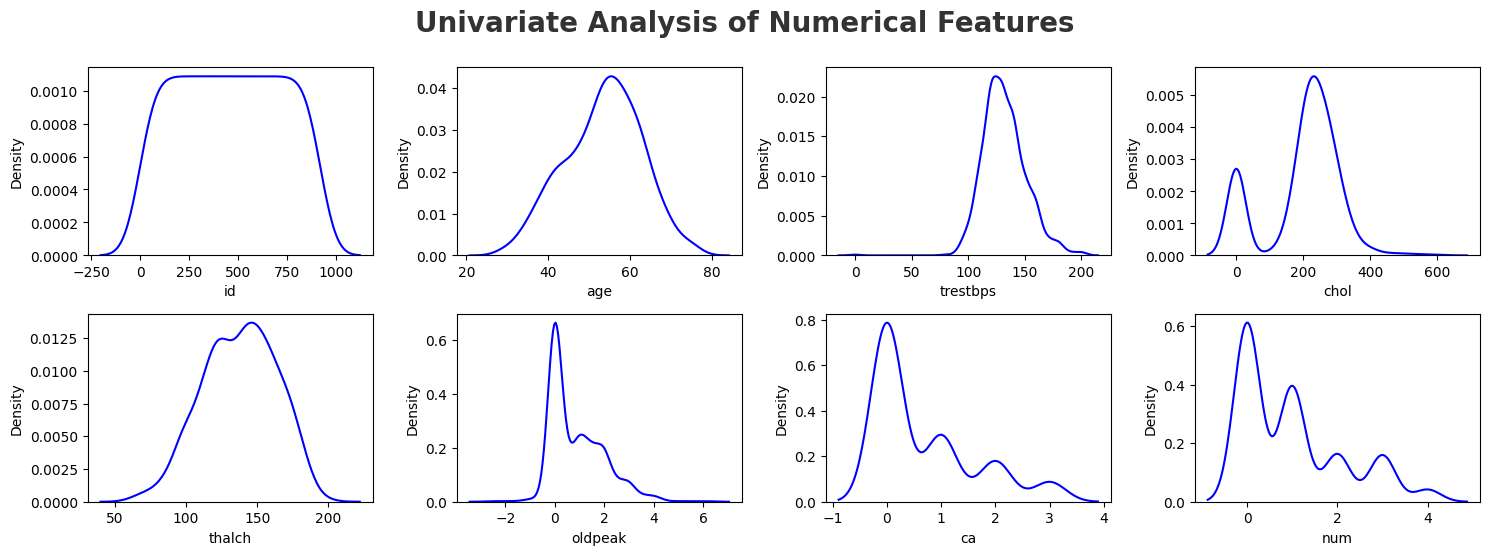

In [11]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

**Insights**
 - `age` column looks A kind of normal distribution — most patients are between 50–60 years old (Slight Right Skew).
 - `trestbps` (Resting BP) More than 120–140 — normal range of BP (Mild Right Skew).
 - `thalch` (Max HR), more values ​​between 100–170 bpm.(Slight Left Skew).
 - `oldpeak` (ST depression), Most values ​​are between 0–2, with some outliers up to 6.(Strong Right Skew).

### Categorical Features

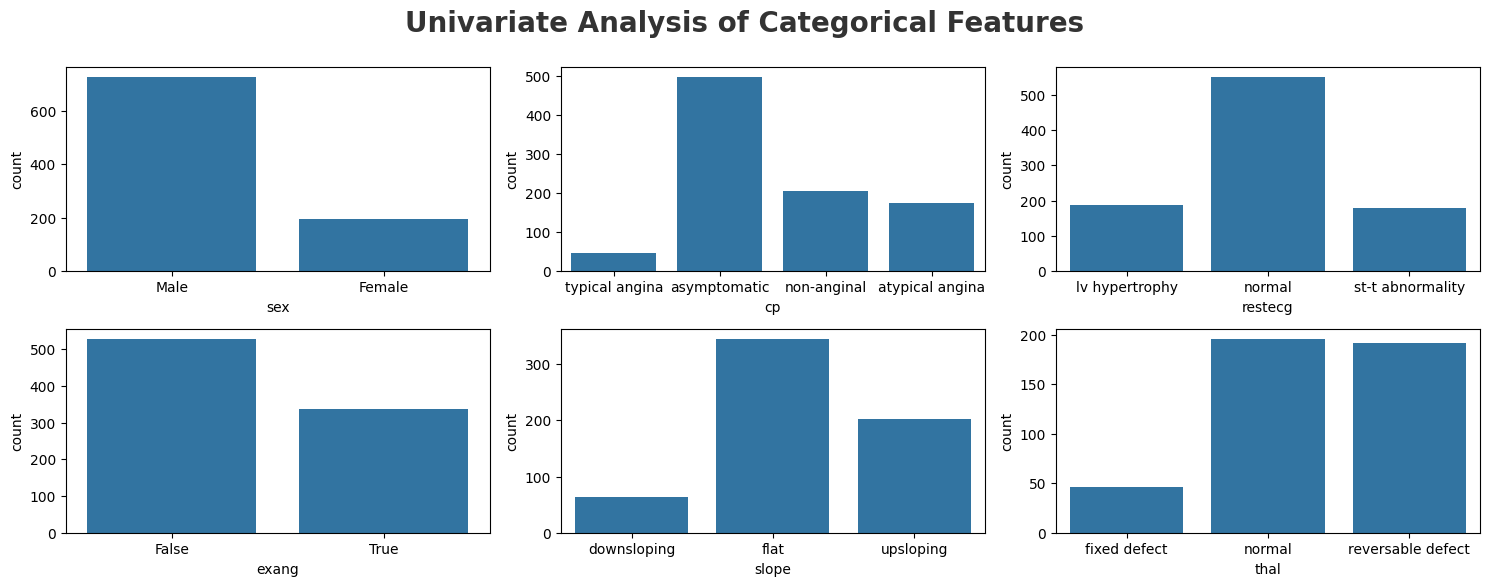

In [12]:
# categorical columns
for col in ['dataset', 'fbs']:
    if col in categorical_features:
        categorical_features.remove(col)

plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

**Insights**
 - `restecg`, `slope`, `thal`  and  `cp (Chest Pain Type)` coulmns have signle category dominating.
 - `sex`, There may be bias in the model (male pattern is learned more). Therefore, future data balancing is needed..
 - In rest of the columns are balanced.

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

In [13]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 2 discrete features : ['ca', 'num']

We have 6 continuous_features : ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak']


**Note**
* discrete value: [2,2,2,3,2,5,2,3,5] -> countable.
* continuous value: [2,3,4,4,5,5,6,2,2,8] -> unique.

### Check Correlation in Numerical features

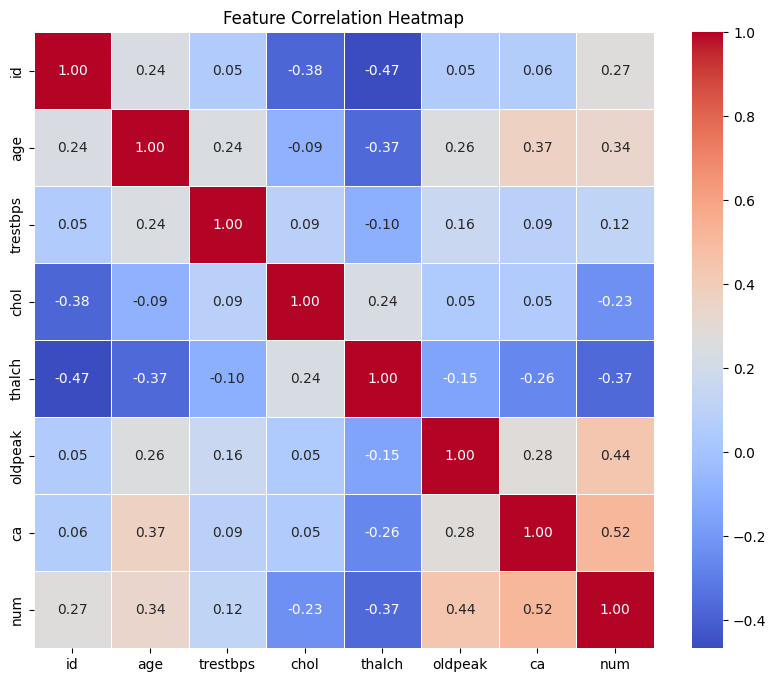

In [14]:
num_df = df.select_dtypes(include=['int64', 'float64'])
corr = num_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# sns.clustermap(corr, cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()




**Insights**
 - `oldpeak`, `age`, The strongest positive relationship is seen between both column.

### Check Multicollinearity in Numerical features

In [15]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Insights**
 - There is no multicollinearity between any variables

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e case_status**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [16]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['num'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,sex,Reject Null Hypothesis
1,cp,Reject Null Hypothesis
2,restecg,Reject Null Hypothesis
3,exang,Reject Null Hypothesis
4,slope,Reject Null Hypothesis
5,thal,Reject Null Hypothesis


**Report** 
* Here `requires_job_training` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

### Checking Null Values

In [17]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [18]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak']


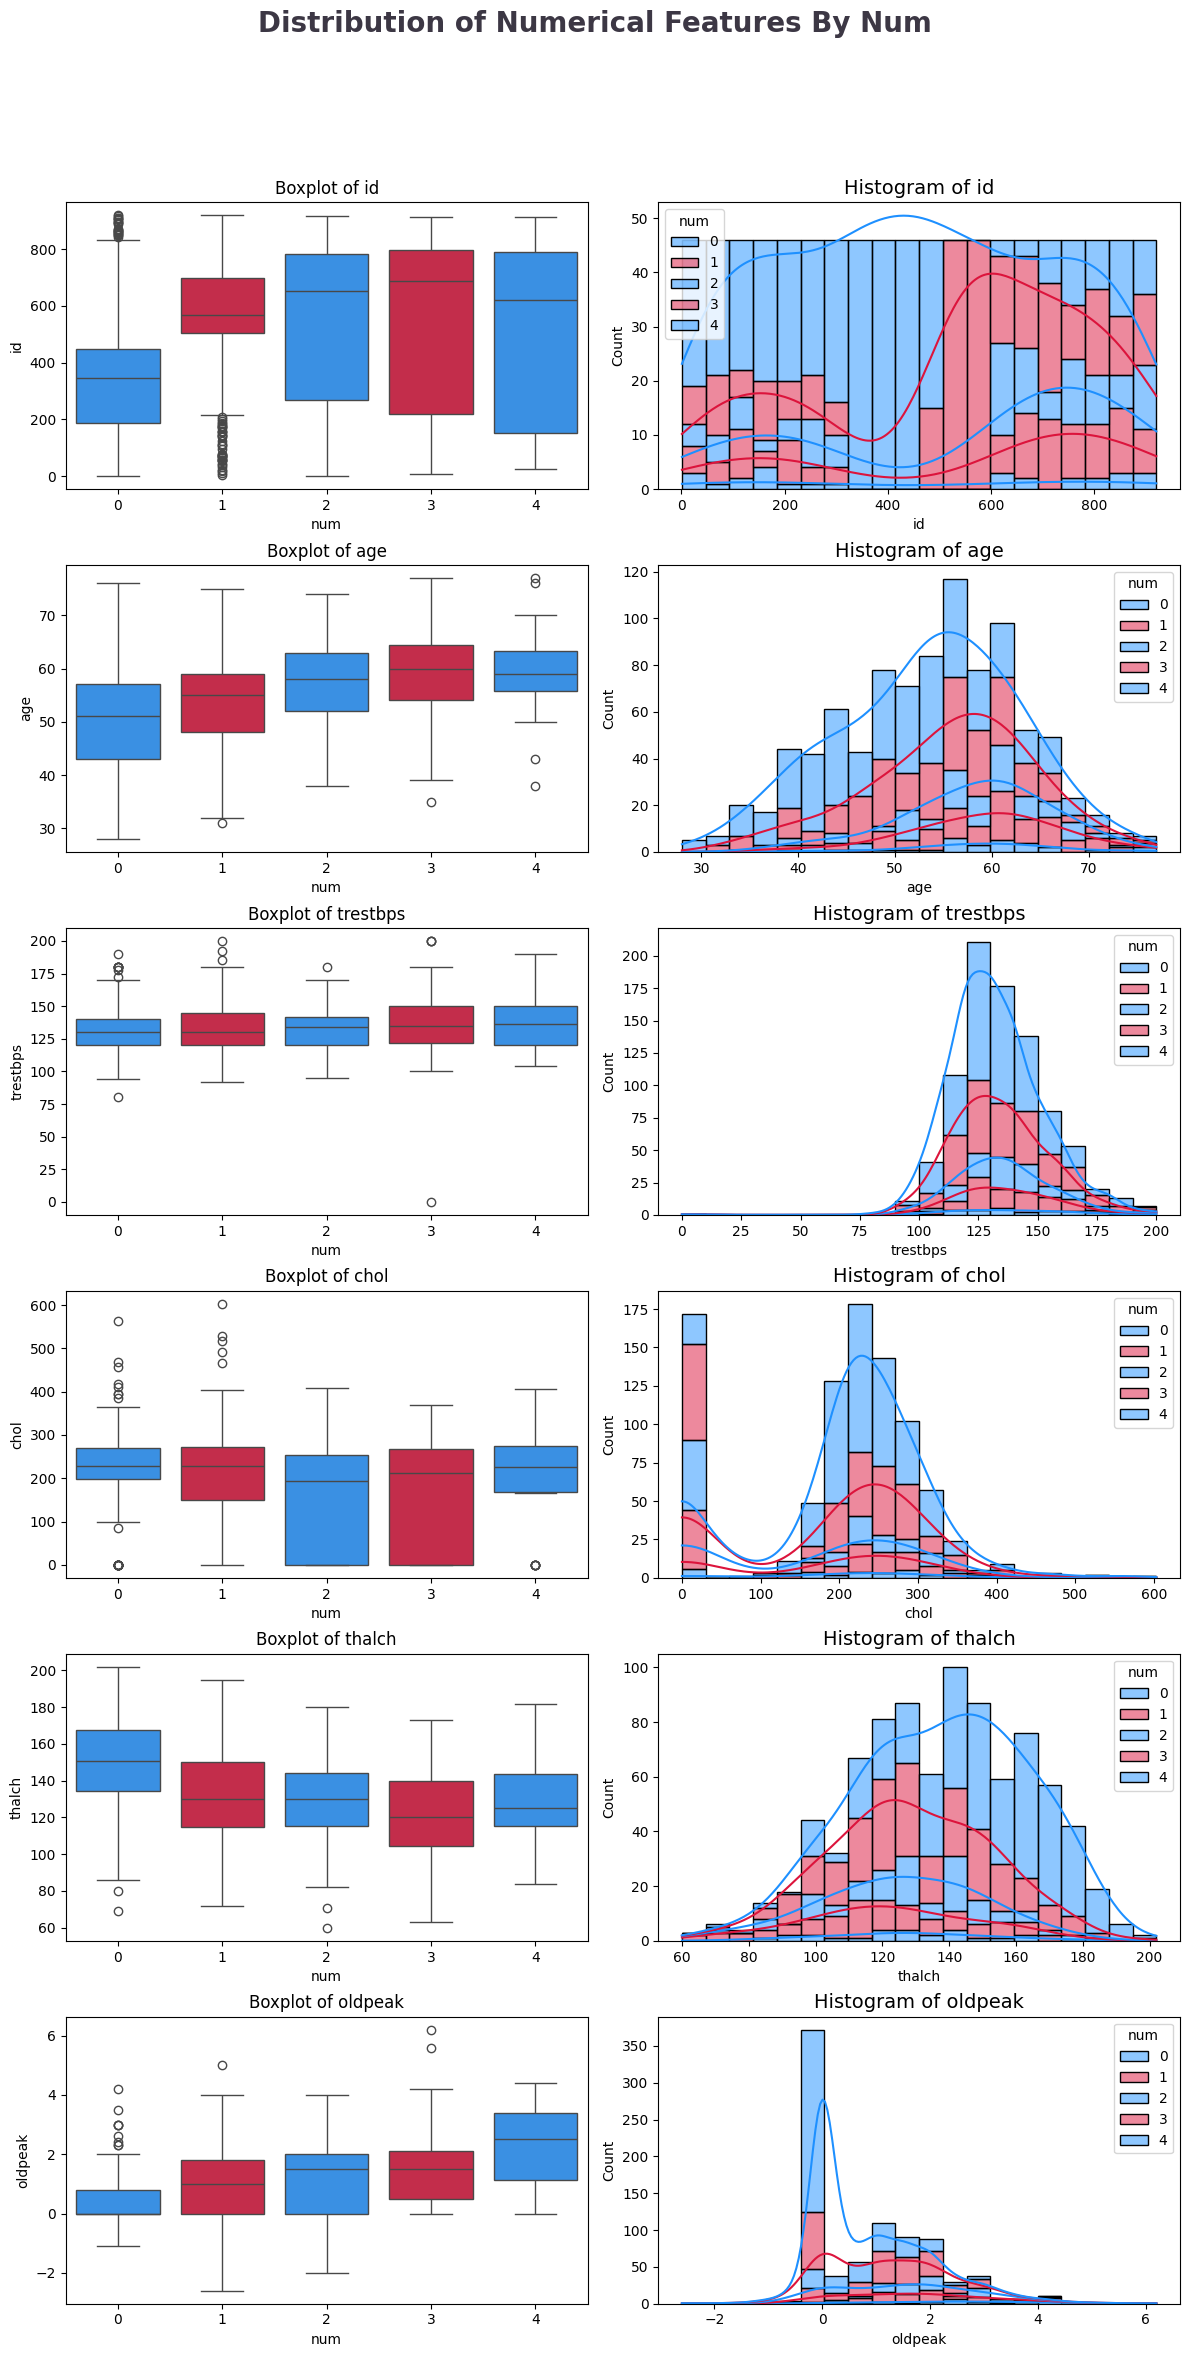

In [62]:
clr1 = ['#1E90FF', '#DC143C']
# fig, ax = plt.subplots(0, 3, figsize=(10,12))
fig, ax = plt.subplots(nrows=len(continues_features), ncols=2, figsize=(12, 4 * len(continues_features)))
fig.suptitle('Distribution of Numerical Features By Num', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='num', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='num', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

## Initial Analysis Report

* **The oldpeak has many outliers which can be Handled in Feature Engineering and `oldpeak` is Right Skewed.**
* **`thalch (Max HR) ` as indicated by the length of the box and whiskers. There are a few outliers on both the lower and upper ends**
* **`trestbps` shows a distribution that is close to symmetrical or slightly right-skewed box plot shows outliers at the higher end**
* **The `age` There are a few outliers at the lower end of the age range and slightly left-skewed**
* **There are missing values in the dataset.**
* **The `num` column is the target to predict.**
* **In the Categorical column, features can be made Binary numerical in feature Encoding**

## 4. Visualization

### 4.1 Visualize the Target Feature

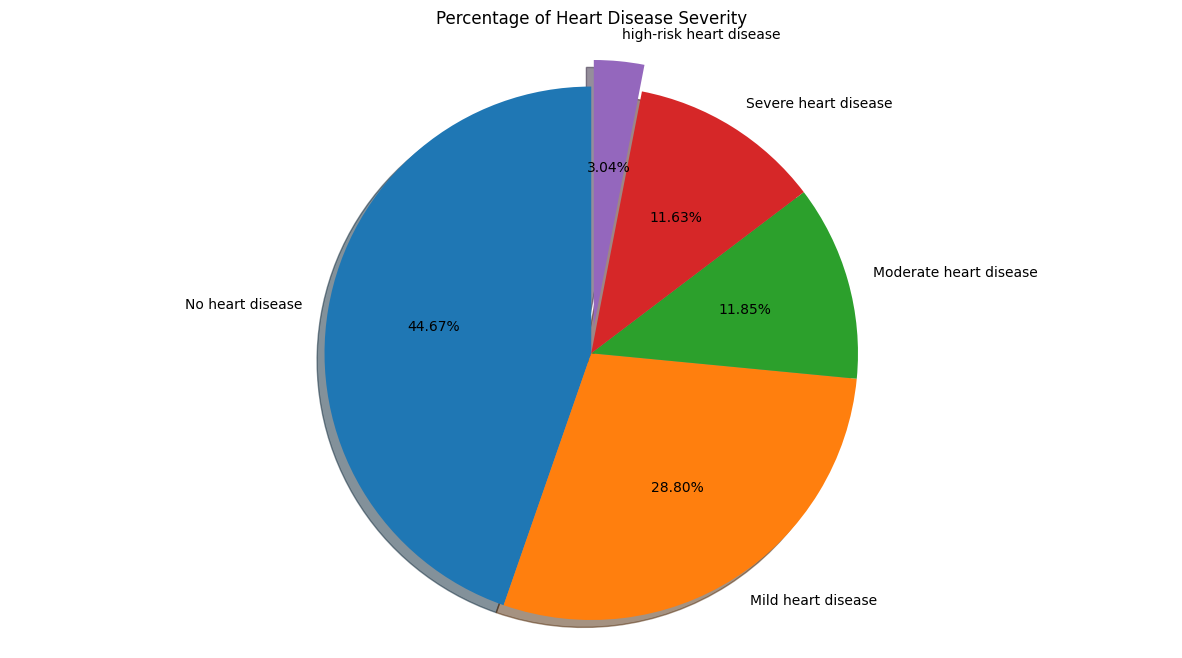

In [ ]:
# Calculate the value counts and normalize to get percentages
percentage = df.num.value_counts(normalize=True).sort_index() * 100

# Define labels for all 5 classes, ensuring they are in the correct order (matching sort_index)
labels = ["No heart disease", "Mild heart disease", "Moderate heart disease", "Severe heart disease", "High-risk heart disease"]
# Define explode for all 5 slices. Here we explode the 'High-risk' slice.
explode = (0, 0, 0, 0, 0.1)
# Define a color for each of the 5 classes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
# Plot the pie chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.pie(percentage,labels=labels,startangle=90,autopct='%1.2f%%',explode=explode,shadow=True,colors=colors)

# Ensure the pie chart is a circle
ax.axis('equal')
# Add a title
ax.set_title('Percentage of Heart Disease Severity')
# Show the plot
plt.show()

# percentage = df.num.value_counts(normalize=True)*100
# labels = ["No heart disease","Mild heart disease","Moderate heart disease", "Severe heart disease","high-risk heart disease"]

# # Plot PieChart with Ploty library
# fig, ax = plt.subplots(figsize =(15, 8))
# explode = (0, 0.1)
# colors = ['#1188ff','#e63a2a']
# ax.pie(percentage, labels = labels, startangle = 90,
#        autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
# plt.show()

* From the chart it is seen that the Target Variable is Imbalanced
**What is imbalanced data?**

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Denied value has more count than the Certified value of the dataset.

### 4.2 Does High-Risk cp (Chest Pain Type) has any impact on Heart problem ?

In [30]:
#group data by cp, exang and their count of nums
# df.groupby(['exang', 'cp'])['num'].value_counts(normalize=True).to_frame()*100
# df.groupby('exang')['num'].value_counts(normalize=True).to_frame()*100
df.groupby('cp')['num'].value_counts(normalize=True).to_frame()*100

proportion
cp              num            
asymptomatic    1     39.717742
                0     20.967742
                2     17.943548
                3     16.733871
                4      4.637097
atypical angina 0     86.206897
                1     10.919540
                3      1.724138
                2      1.149425
non-anginal     0     64.215686
                1     18.137255
                3      8.823529
                2      6.862745
                4      1.960784
typical angina  0     56.521739
                1     26.086957
                2      8.695652
                3      6.521739
                4      2.173913

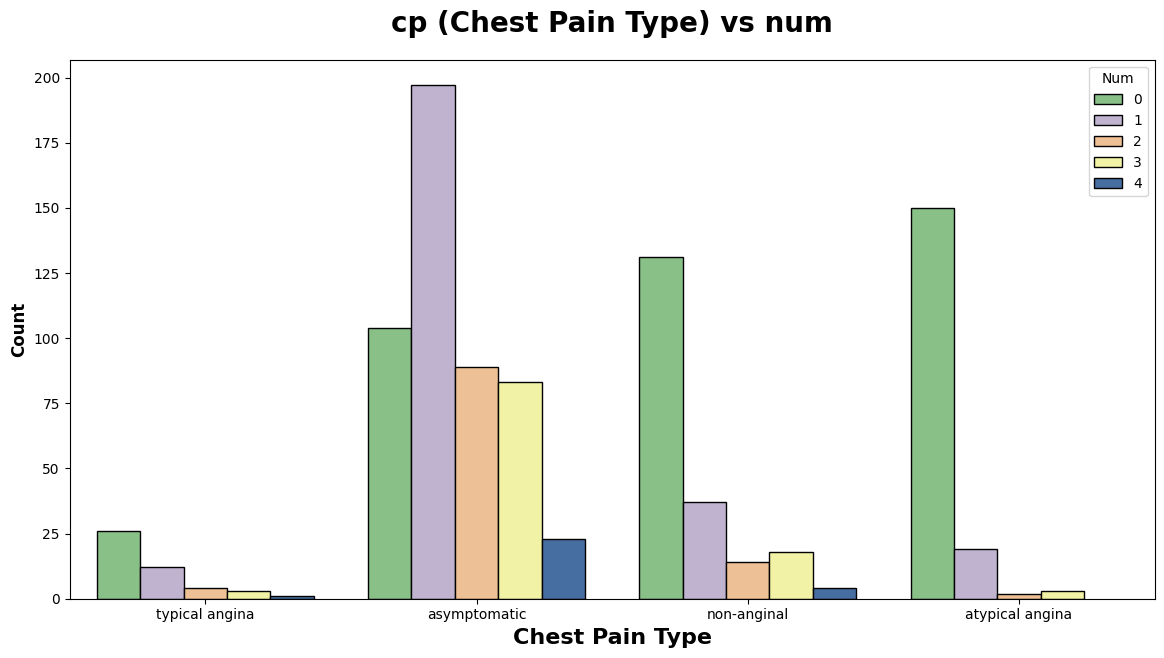

In [31]:
plt.subplots(figsize=(14,7))
sns.countplot(x="cp",hue="num", data=df, ec = "black",palette="Accent")
plt.title("cp (Chest Pain Type) vs num", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Chest Pain Type", weight="bold", fontsize=16)
plt.legend(title="Num", fancybox=True)
plt.show()

In [32]:
df2 = df.copy()

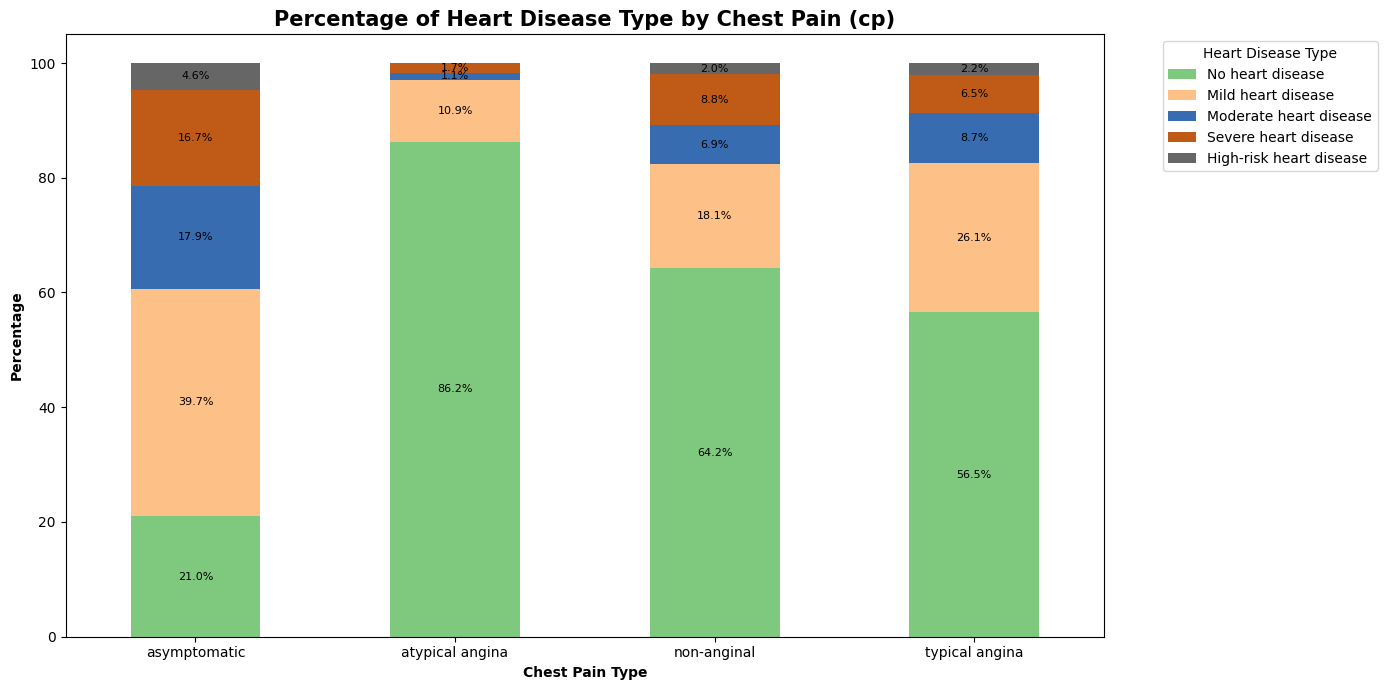

In [36]:
# plt.figure(figsize=[14,7])

# (100*df2[df2["num"].isin(['0'])]['cp'].value_counts()/df2['cp'].value_counts()).plot(
#     kind='bar',stacked=True , colormap='Accent')
# plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
# order1 = (100*df2[df2["num"].isin(['Certified'])]['cp'].value_counts()/df2['cp'].value_counts())
# for n in range(order1.shape[0]):
#     count = order1[n]
#     strt='{:0.1f}%'.format(count)
#     plt.text(n,count+0.1,strt,ha='center')

# plt.xlabel('Continent' , fontweight ='bold')
# plt.xticks(rotation=0)
# plt.show()

df_crosstab = pd.crosstab(df2['cp'], df2['num'], normalize='index') * 100

# Create a mapping for descriptive heart disease names
heart_disease_labels = {
    0: "No heart disease",
    1: "Mild heart disease",
    2: "Moderate heart disease",
    3: "Severe heart disease",
    4: "High-risk heart disease"
}

# Apply the new column names
df_crosstab = df_crosstab.rename(columns=heart_disease_labels)

# Plot the stacked percentage bar chart
ax = df_crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=[14, 7],
    colormap='Accent'
)

# Set the title and labels
plt.title("Percentage of Heart Disease Type by Chest Pain (cp)", fontsize=15, fontweight='bold')
plt.xlabel("Chest Pain Type", fontweight='bold')
plt.ylabel("Percentage", fontweight='bold')
plt.xticks(rotation=0)

# Add the percentage labels to each bar segment
for n in ax.containers:
    # Get the height of each bar segment
    labels = [f'{h:.1f}%' if h > 0 else '' for h in n.datavalues]
    ax.bar_label(n, labels=labels, label_type='center', fontsize=8, color='black')

# Add a legend
plt.legend(title='Heart Disease Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Report:**
* As per the Chart Heart Attack more than other CP.
* 39.2% of High-Risk pacient are from asymptomatic.
* This is followed by typical angina with around 17% of High-Risk .
* Highest chance of getting Attack if you are from `asymptomatic` and followed by `typical angina`

### 4.3 Does patient exang (Exercise-induced Angina) has any impact on Num(attack) ?

In [49]:
#group data by Education and their count of case_status
df.groupby('exang')['num'].value_counts(normalize=True).to_frame()*100

proportion
exang num            
False 0     63.636364
      1     20.265152
      2      8.333333
      3      5.681818
      4      2.083333
True  1     43.026706
      3     18.991098
      2     17.210682
      0     16.320475
      4      4.451039

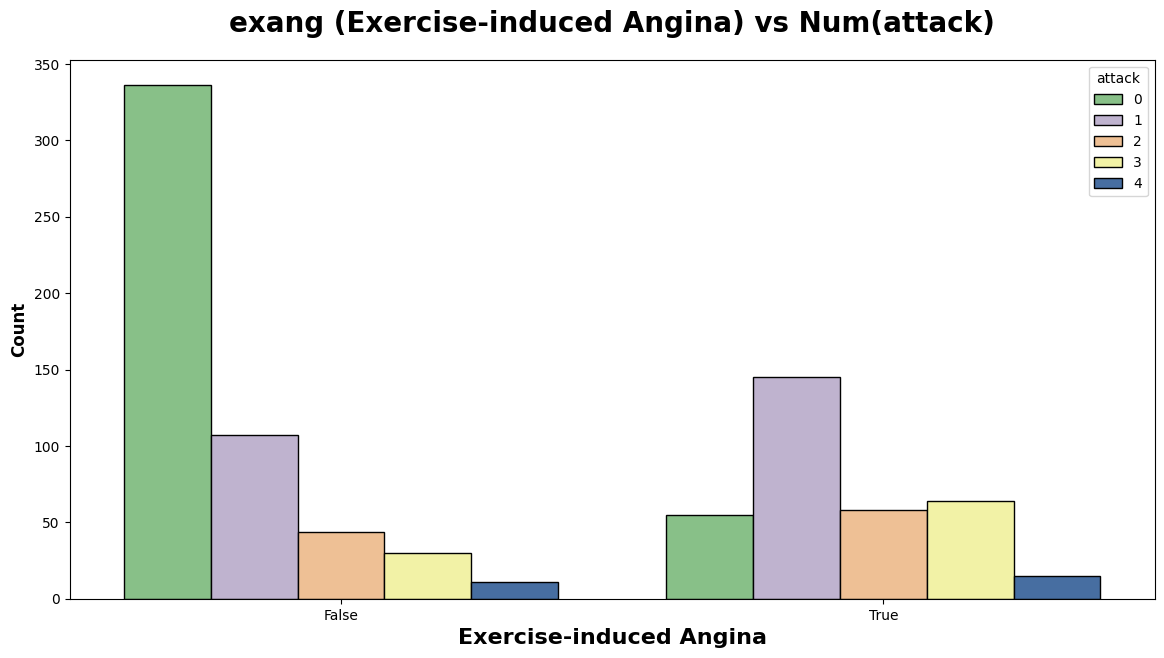

In [41]:
# plt.subplots(figsize=(14,7))
# sns.countplot(x="exang",hue="nums", data=df, ec = "black",palette="Accent")
# plt.title("exang (Exercise-induced Angina) vs Num(attack)", weight="bold",fontsize=20, pad=20)
# plt.ylabel("Count", weight="bold", fontsize=12)
# plt.xlabel("Exercise-induced Angina", weight="bold", fontsize=16)
# plt.legend(title="attack", fancybox=True)
# plt.show()
# Assuming 'target' is the correct column name for the attack variable
plt.subplots(figsize=(14,7))
sns.countplot(x="exang", hue="num", data=df, ec="black", palette="Accent")
plt.title("exang (Exercise-induced Angina) vs Num(attack)", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Exercise-induced Angina", weight="bold", fontsize=16)
plt.legend(title="attack", fancybox=True)
plt.show()


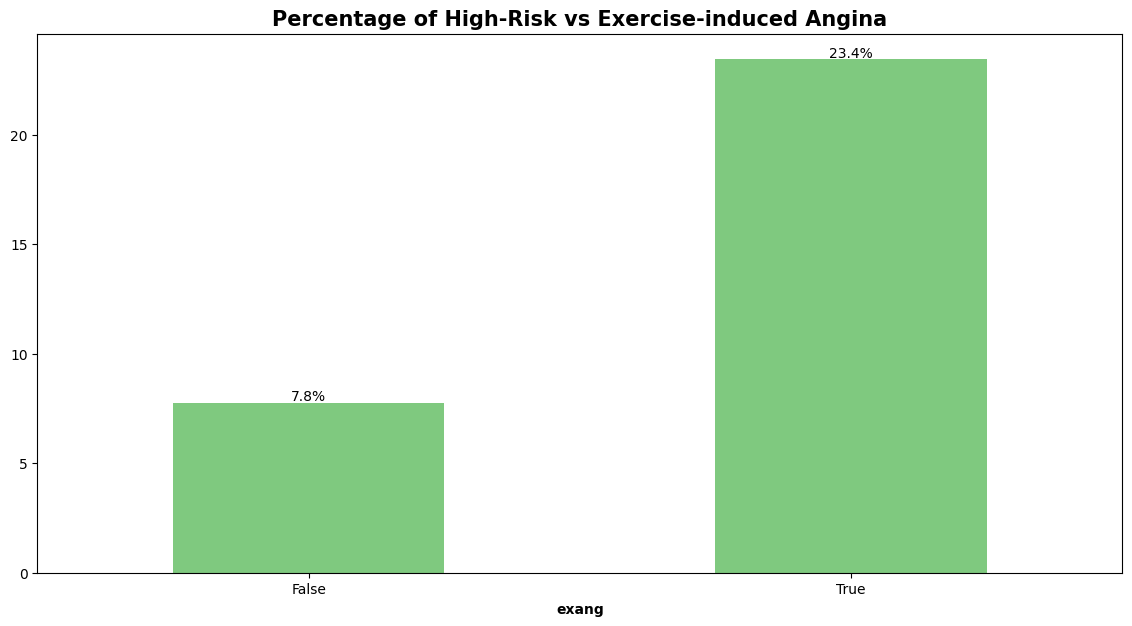

In [47]:
plt.figure(figsize=[14,7])

(100*df2[df2["num"].isin([4,3])]['exang'].value_counts()/df2['exang'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of High-Risk vs Exercise-induced Angina" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["num"].isin([4,3])]['exang'].value_counts()/df2['exang'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('exang' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insights**
- Exercise-induced Angina status has high impact
- `True`  have higher cange of being attack then the others.

### 4.4 Does patient's ST segment slope has any impact on NUM(attack) ?

In [50]:
#group data by has_job_experience and count case_status
df.groupby('slope')['num'].value_counts(normalize=True).to_frame()*100

proportion
slope       num            
downsloping 1     23.809524
            0     22.222222
            2     22.222222
            3     20.634921
            4     11.111111
flat        1     41.739130
            0     22.898551
            2     16.521739
            3     14.782609
            4      4.057971
upsloping   0     61.576355
            1     19.211823
            2      9.359606
            3      8.374384
            4      1.477833

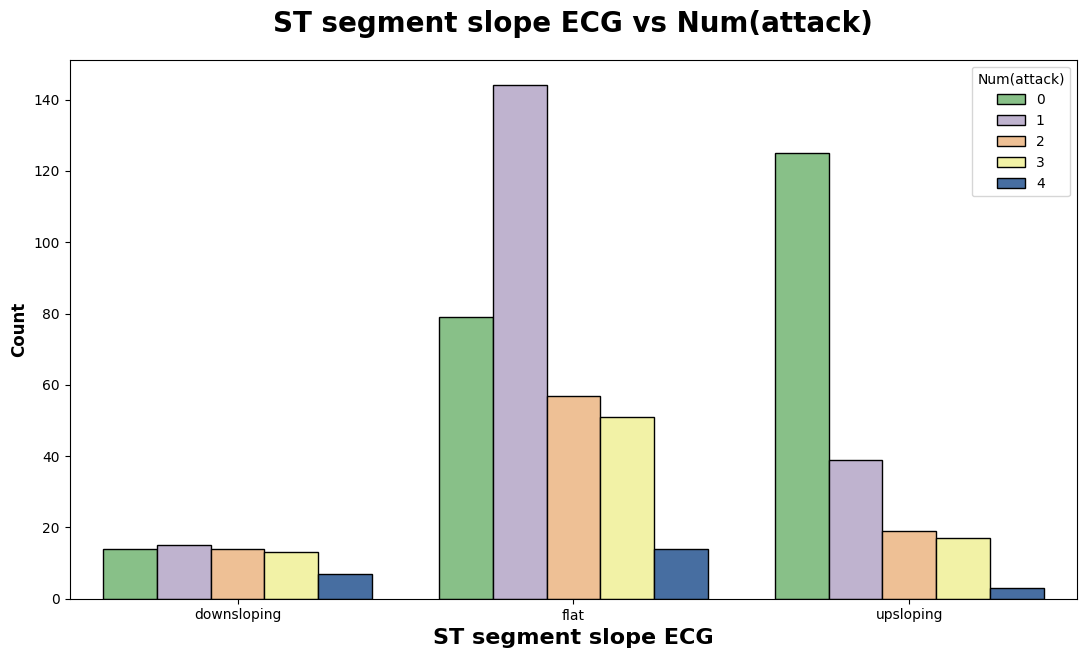

In [51]:
plt.subplots(figsize=(13,7))
sns.countplot(x="slope",hue="num", data=df, ec= "black",palette="Accent")
plt.title("ST segment slope ECG vs Num(attack)", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("ST segment slope ECG", weight="bold", fontsize=16)
plt.legend(title="Num(attack)", fancybox=True)
plt.show()


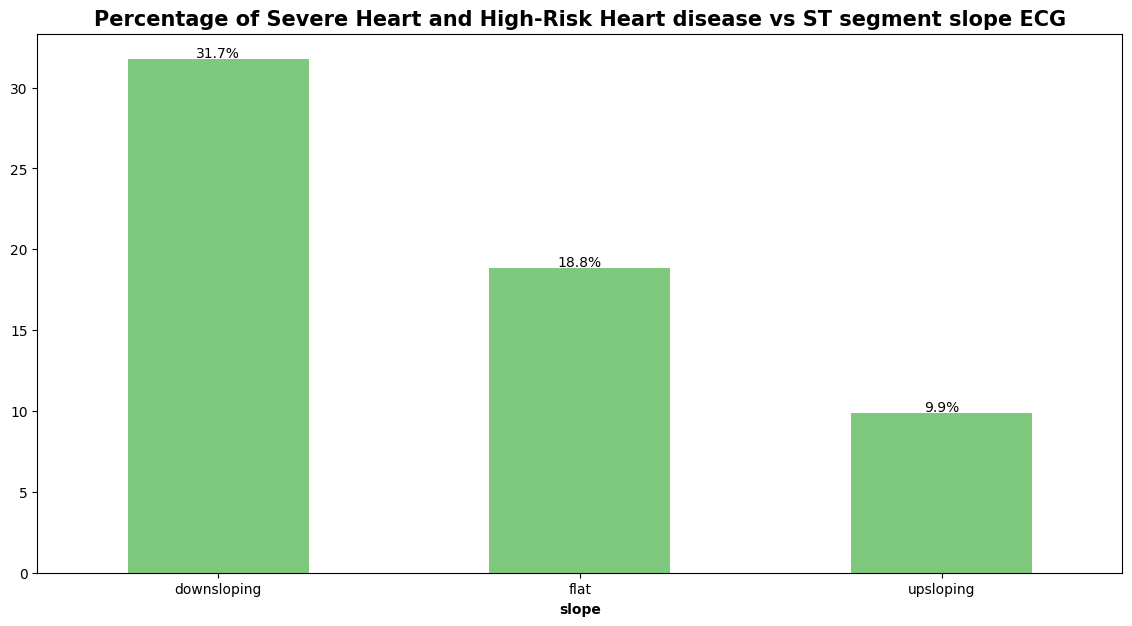

In [53]:
plt.figure(figsize=[14,7])

(100*df2[df2["num"].isin([3,4])]['slope'].value_counts()/df2['slope'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Severe Heart and High-Risk Heart disease vs ST segment slope ECG" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["num"].isin([3,4])]['slope'].value_counts()/df2['slope'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('slope' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
* People with previous ST segment slope ECG Severe Heart and High-Risk Heart (downsloping)31.7% (flat) 18.8% (upsloping) 9.9% only 39.6% patient's has been not attack.
* This means ST segment slope has effect on Attack.
* There is a slight edge for the people with ST segment slope then the other. But the difference is not huge.

### 4.5 If the ECG pattern feature, does it make any impact on Num(attack)?

In [55]:
#group data by requires_job_training and count case_status
df.groupby('restecg')['num'].value_counts(normalize=True).to_frame()*100

proportion
restecg          num            
lv hypertrophy   0     43.617021
                 1     23.936170
                 3     13.829787
                 2     11.702128
                 4      6.914894
normal           0     48.638838
                 1     30.852995
                 2      9.981851
                 3      9.074410
                 4      1.451906
st-t abnormality 0     34.078212
                 1     26.815642
                 2     17.877095
                 3     17.318436
                 4      3.910615

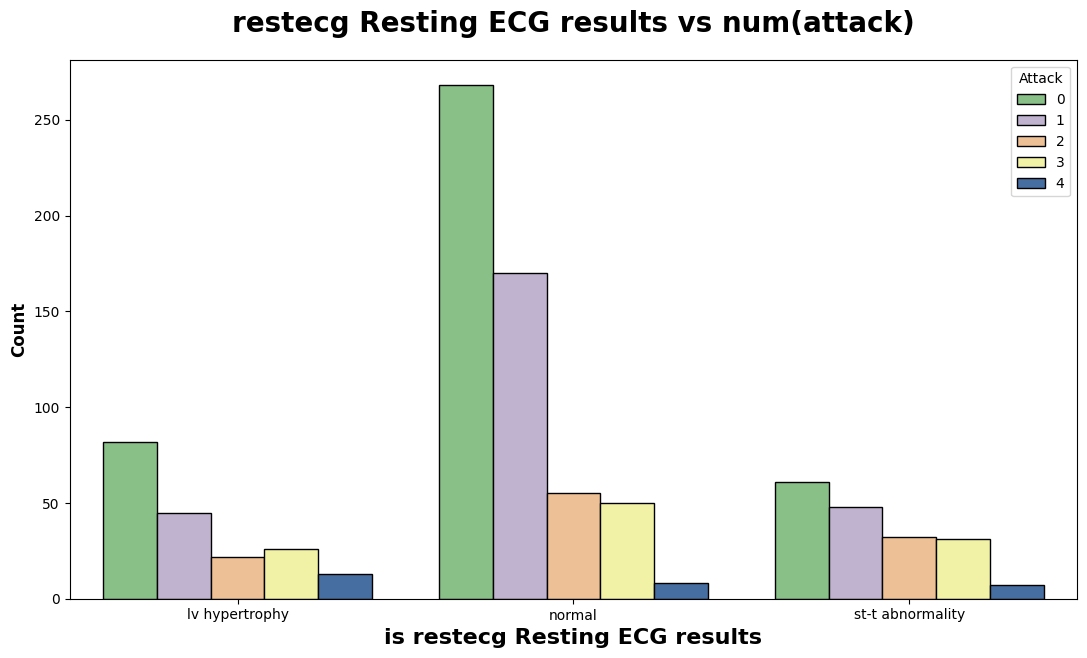

In [56]:
plt.subplots(figsize=(13,7))
sns.countplot(x="restecg",hue="num", data=df, ec= "black",palette="Accent")
plt.title("restecg Resting ECG results vs num(attack)", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("is restecg Resting ECG results", weight="bold", fontsize=16)
plt.legend(title="Attack", fancybox=True)
plt.show()

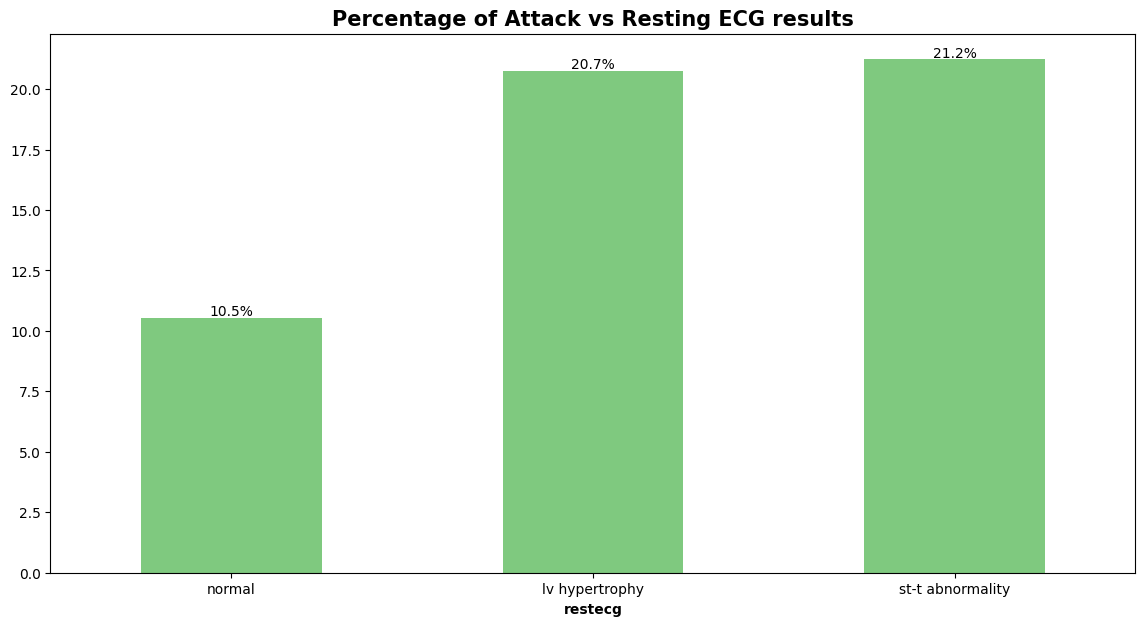

In [58]:
plt.figure(figsize=[14,7])

(100*df2[df2["num"].isin([3,4])]['restecg'].value_counts()/df2['restecg'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Attack vs Resting ECG results" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["num"].isin([3,4])]['restecg'].value_counts()/df2['restecg'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('restecg' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
* If patient's has Resting ECG and it doesn have any effect on Attack.
* 21.2% of patient has st-tabnormality. 
* 20.7% of people who .
* For employees who has Resting 52.7% of people get attack.
* As we checked in dd test this feature doesn't have much impact on target variable, which is confirmed by above plot.

### 4.6 Does Blood Pressure(BP cuff) has any impact on Attack?

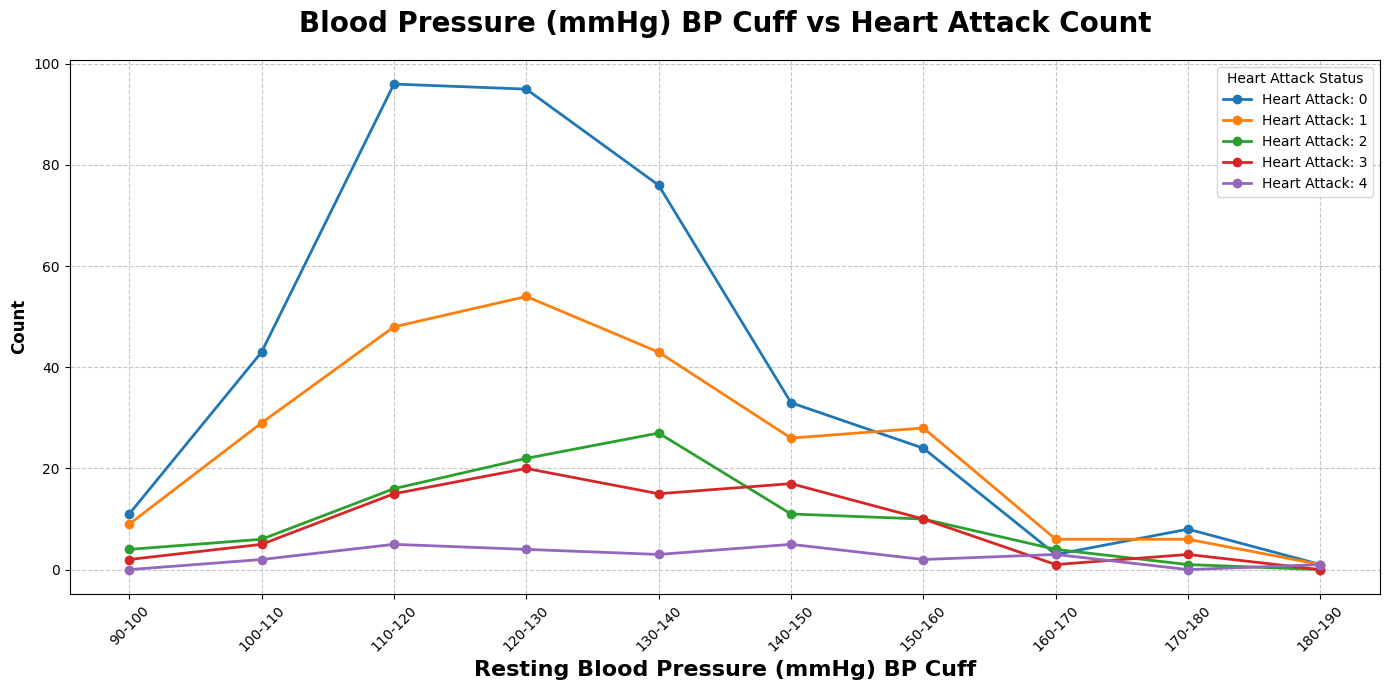

In [ ]:
# plt.subplots(figsize=(10,13))
# sns.lineplot(x="num",y='trestbps', data=df, palette="Accent")
# plt.title("Blood Pressure (mmHg) BP Cuff vs Attack", weight="bold",fontsize=20, pad=20)
# plt.ylabel("Count", weight="bold", fontsize=12)
# plt.xlabel("Resting Blood Pressure (mmHg) BP Cuff", weight="bold", fontsize=16)
# plt.ylim()
# plt.show()

bins = np.arange(90, 200, 10)  # Bins from 90 to 190 mmHg, step=10
labels = [f'{i}-{i+10}' for i in bins[:-1]]
df['bp_bins'] = pd.cut(df['trestbps'], bins=bins, labels=labels, include_lowest=True)
# Group by blood pressure bins and heart attack status (num), then count occurrences
grouped = df.groupby(['bp_bins', 'num']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 7))

# Plot line for each heart attack status (num)
for num_val in grouped.columns:
    plt.plot(grouped.index, grouped[num_val], marker='o', linewidth=2, label=f'Heart Attack: {num_val}')

plt.title("Blood Pressure (mmHg) BP Cuff vs Heart Attack Count", weight="bold", fontsize=20, pad=20)
plt.xlabel("Resting Blood Pressure (mmHg) BP Cuff", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Heart Attack Status")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Insights**
 - The distrubution of both is similar. But there are outliers in both the classes which need to be handeled.

### 4.7 Sex and its impact on Attack

In [81]:
#group data by unit_of_wage and count the case_status
df.groupby('sex')['num'].value_counts(normalize=True)

sex     num
Female  0      0.742268
        1      0.154639
        2      0.051546
        3      0.041237
        4      0.010309
Male    0      0.367769
        1      0.323691
        2      0.136364
        3      0.136364
        4      0.035813
Name: proportion, dtype: float64

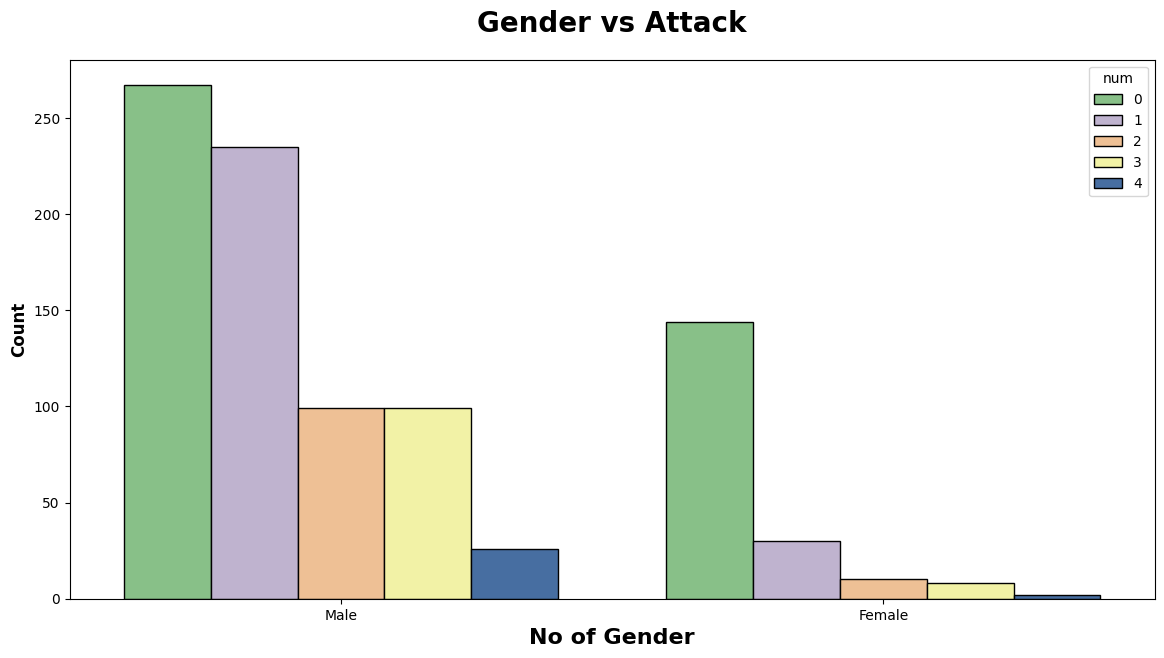

In [88]:
plt.subplots(figsize=(14,7))
sns.countplot(x="sex",hue="num", data=df,ec='k', palette='Accent')
plt.title("Gender vs Attack", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Gender", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

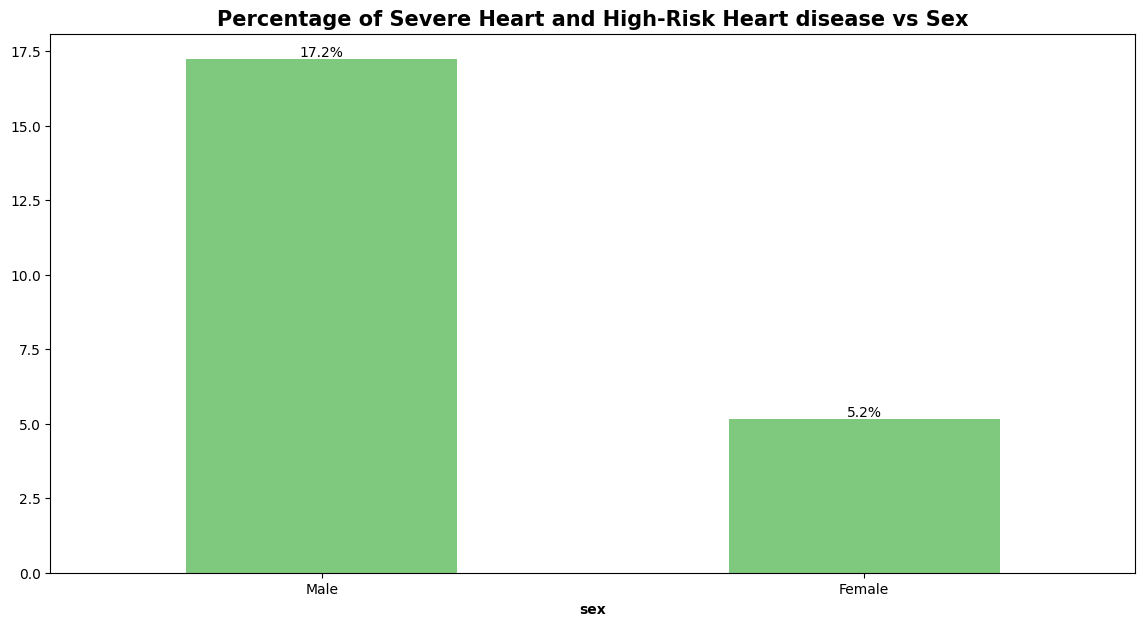

In [85]:
plt.figure(figsize=[14,7])

(100*df2[df2["num"].isin([3,4])]['sex'].value_counts()/df2['sex'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Severe Heart and High-Risk Heart disease vs Sex" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["num"].isin([3,4])]['sex'].value_counts()/df2['sex'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('sex' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
* For employees who applied for hourly pay 65% of them were denied.
* Yearly unit wage application were accepted for 69% and denied for 31% of the time.
* There is a higher chance of yearly contract than other and immediately followed by week and month.

### 4.7 Does Region of employment has impact on Visa status ?

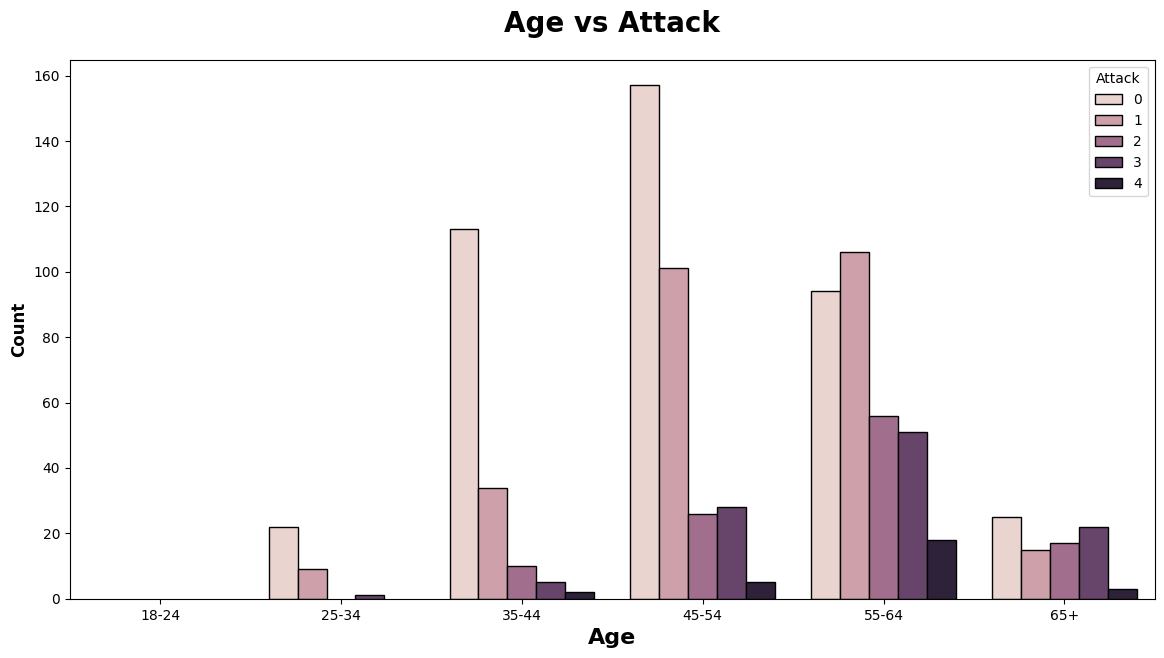

In [105]:
plt.subplots(figsize=(14,7))
bins = [18, 25, 35, 45, 55, 65, 100]  # Age ranges: 18-24, 25-34, 35-44, 45-54, 55-64, 65+
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

sns.countplot(x="age_group",hue="num", data=df,ec='k')
plt.title("Age vs Attack", weight="bold",fontsize=20, pad=20)
plt.xlabel("Age", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Attack", fancybox=True)
plt.show()

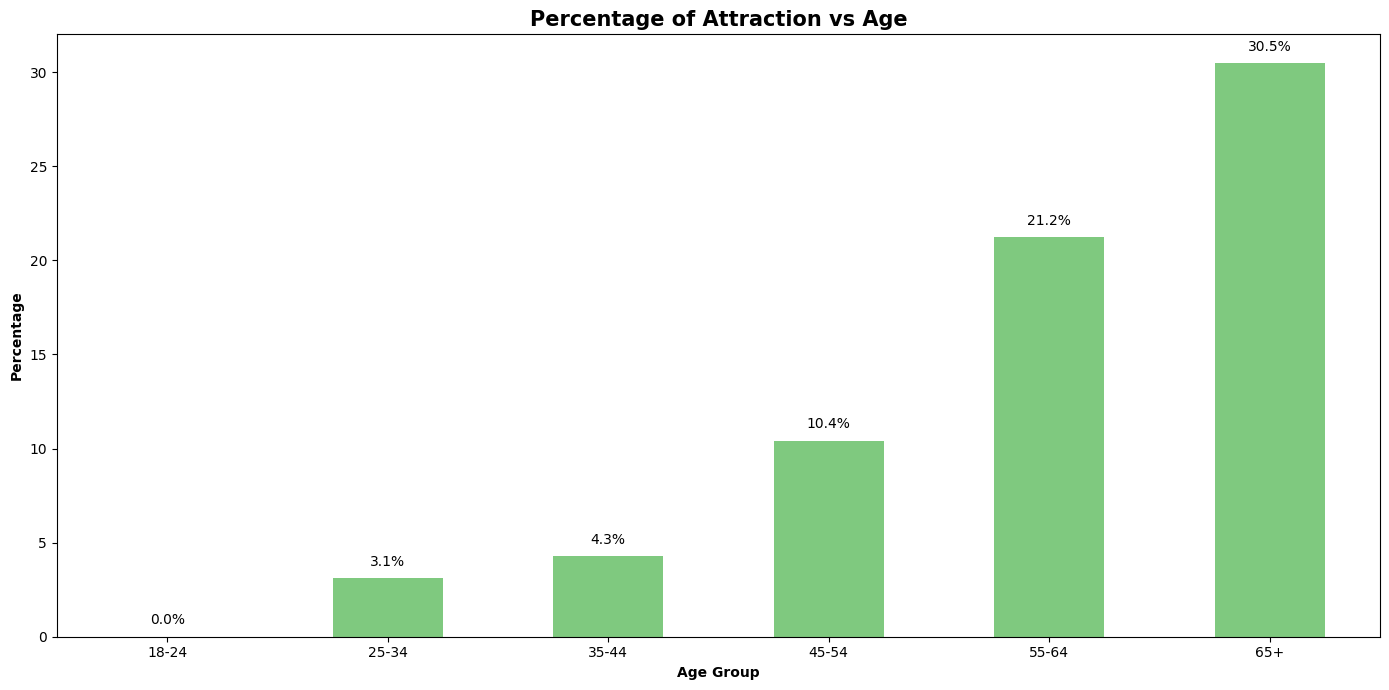

In [114]:
# plt.figure(figsize=[14,7])
# bins = [18, 25, 35, 45, 55, 65, 100]  # Age ranges: 18-24, 25-34, 35-44, 45-54, 55-64, 65+
# labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
# df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# (100*df2[df2["num"].isin([3,4])]['age_group'].value_counts()/df2['age_group'].value_counts()).plot(
#     kind='bar',stacked=True , colormap='Accent')
# plt.title("Percentage of Attrack vs Age" , fontsize = 15, fontweight ='bold'  )
# order1 = (100*df2[df2["num"].isin([3,4])]['age_group'].value_counts()/df2['age_group'].value_counts())
# for n in range(order1.shape[0]):
#     # count = order1[n]
#     count = order1.iloc[n]
#     strt='{:0.1f}%'.format(count)
#     plt.text(n,count+0.1,strt,ha='center')

# plt.xlabel('Age' , fontweight ='bold')
# plt.xticks(rotation=0)
# plt.show()

# Create age group column
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
# Ensure df2 also has the 'age_group' column
df2['age_group'] = pd.cut(df2['age'], bins=bins, labels=labels, include_lowest=True)
# Calculate the percentages, explicitly re-indexing to ensure all age groups are present
total_counts = df2['age_group'].value_counts()
attract_counts = df2[df2["num"].isin([3, 4])]['age_group'].value_counts()
# Divide and fill missing values (from `attract_counts`) with 0
percentage = (100 * attract_counts / total_counts).fillna(0)
# Sort the index to ensure the bar order matches the labels
percentage = percentage.sort_index()
# Plot the data
plt.figure(figsize=[14, 7])
ax = percentage.plot(kind='bar', colormap='Accent')
# Add labels
plt.title("Percentage of Attraction vs Age", fontsize=15, fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)

# Add text labels on top of the bars
for index, value in enumerate(percentage):
    strt = f'{value:0.1f}%'
    plt.text(index, value + 0.5, strt, ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Report** 
* As per chart all the age have very similar pattern of getting Attack.
* There is a slight edge for `55-65+`  age

### 4.8 Does Heart Rate has any impact on Attack ?

In [117]:
df.groupby('thalch').num.value_counts()

thalch  num
60.0    2      1
63.0    3      1
67.0    3      1
69.0    0      1
70.0    3      1
              ..
190.0   0      2
192.0   0      1
194.0   0      1
195.0   1      1
202.0   0      1
Name: count, Length: 308, dtype: int64

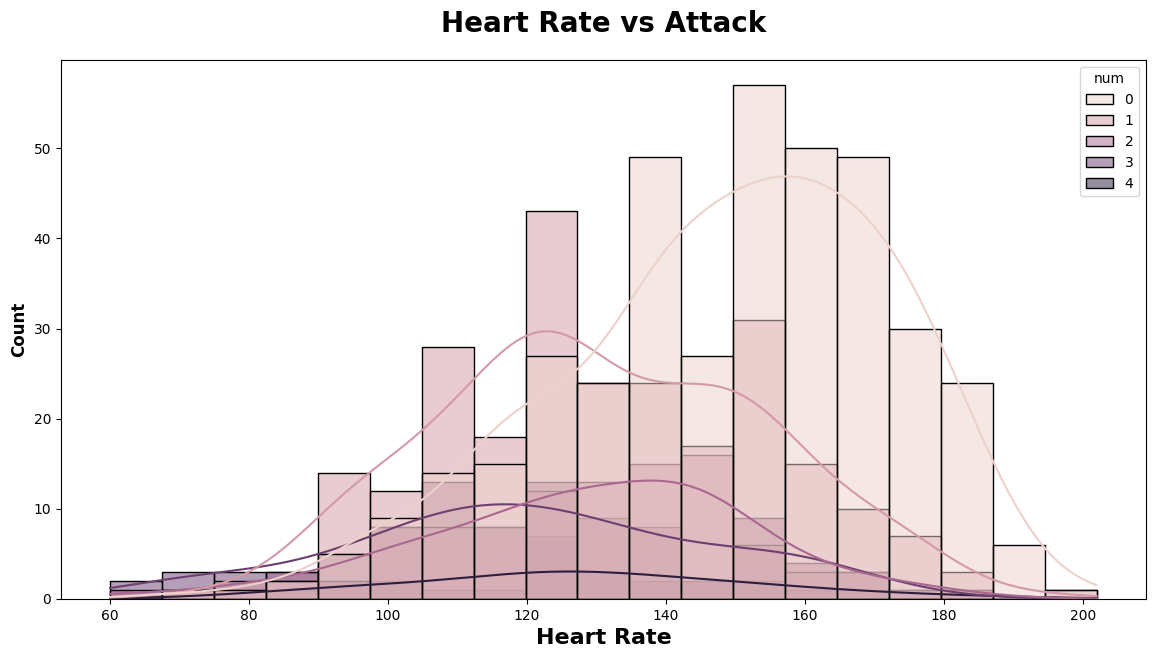

In [123]:
plt.subplots(figsize=(14,7))
sns.histplot(x="thalch",hue="num", data=df, kde=True)
plt.title("Heart Rate vs Attack", weight="bold",fontsize=20, pad=20)
plt.xlabel("Heart Rate", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Insights**
 - The distribution of both the classes are same but need to handel the outliers.

#### 4.8.1 Prevailing wage based on Education

In [139]:
print('Average Prevailing wage based on Employee education')
df.groupby('cp')['exang'].mean().to_frame().sort_values(by='exang',ascending=False)

Average Prevailing wage based on Employee education


,exang
cp,
asymptomatic,0.587234
non-anginal,0.215054
typical angina,0.119048
atypical angina,0.095808


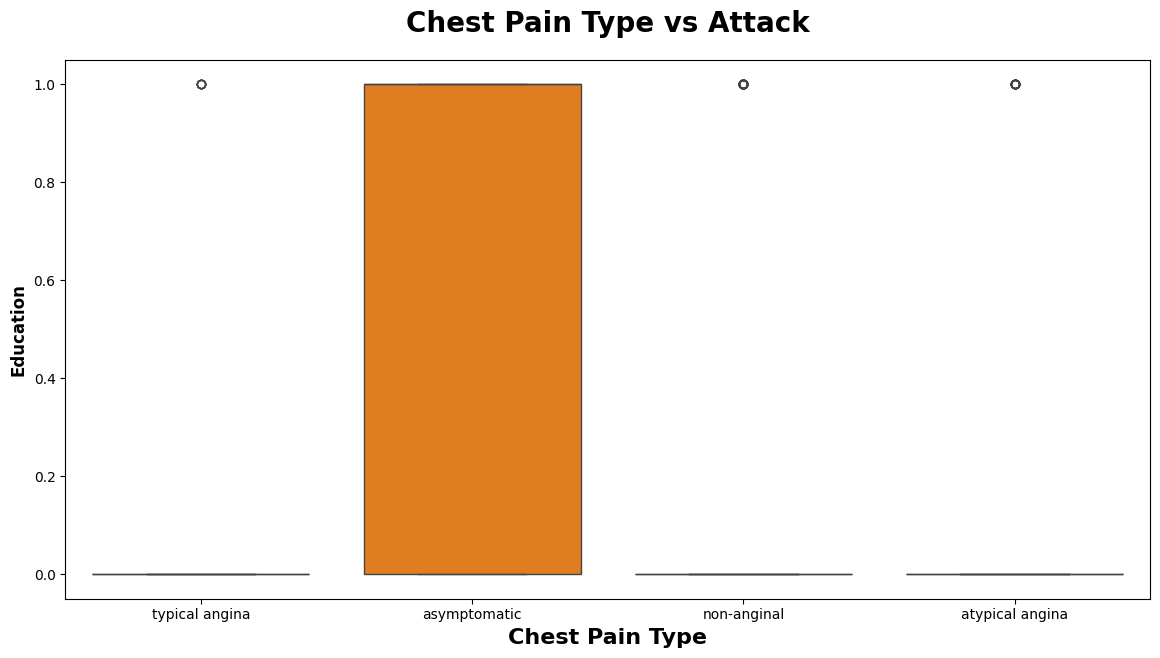

In [147]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="exang",x = "cp", data=df,palette='bright')
plt.title("Chest Pain Type vs Attack", weight="bold",fontsize=20, pad=20)
plt.xlabel("Chest Pain Type", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

**Report**
* Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.
* Master's education applicants have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.

#### 4.8.2 Prevailing wage based on Job experience

In [152]:
print('Median exang wage based on restecg')
df.groupby('restecg')['exang'].median().to_frame().sort_values(by='exang',ascending=False)

Median exang wage based on restecg


,exang
restecg,
lv hypertrophy,0.0
normal,0.0
st-t abnormality,0.0


**Report**
* Suprisingly people who has less job experience has more prevailing wage.
* No job experience applicant has median prevailing wage as 72k USD.
* Previous job experience applicant has median prevailing wage as 69K USD.

#### 4.8.3 Prevailing wage based on Continent

In [42]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


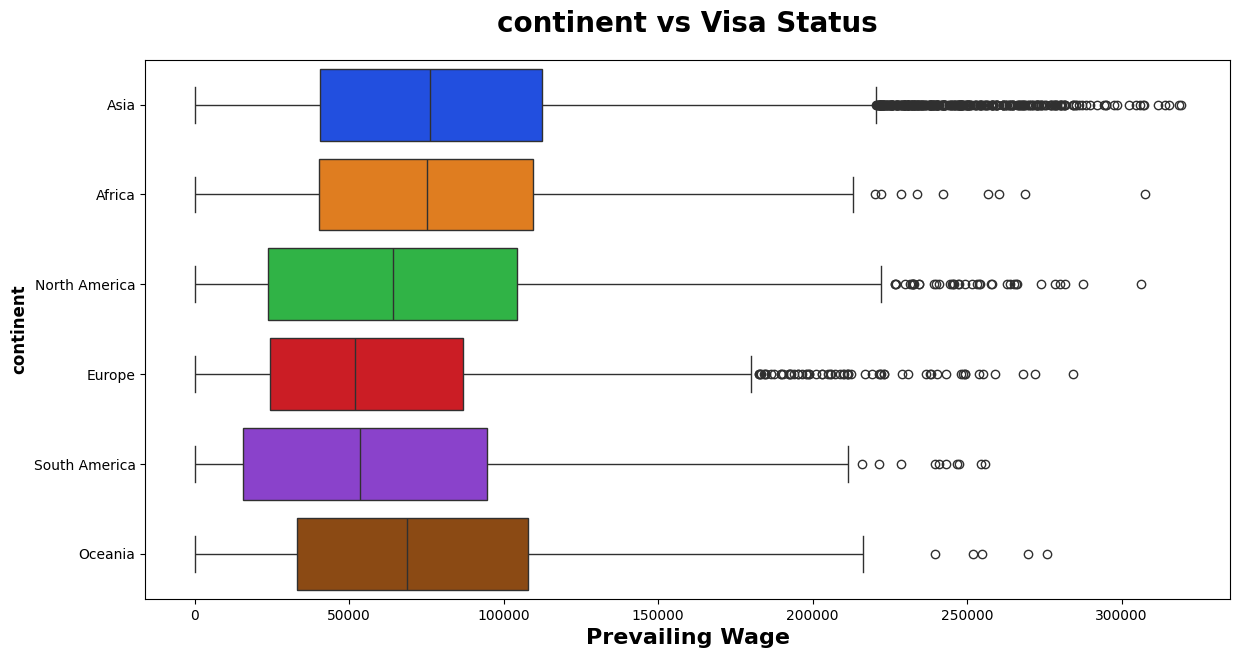

In [43]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

**Report**
* Average salary of people from Asia is higher than other continents.

### 4.9 Year of Establishment 

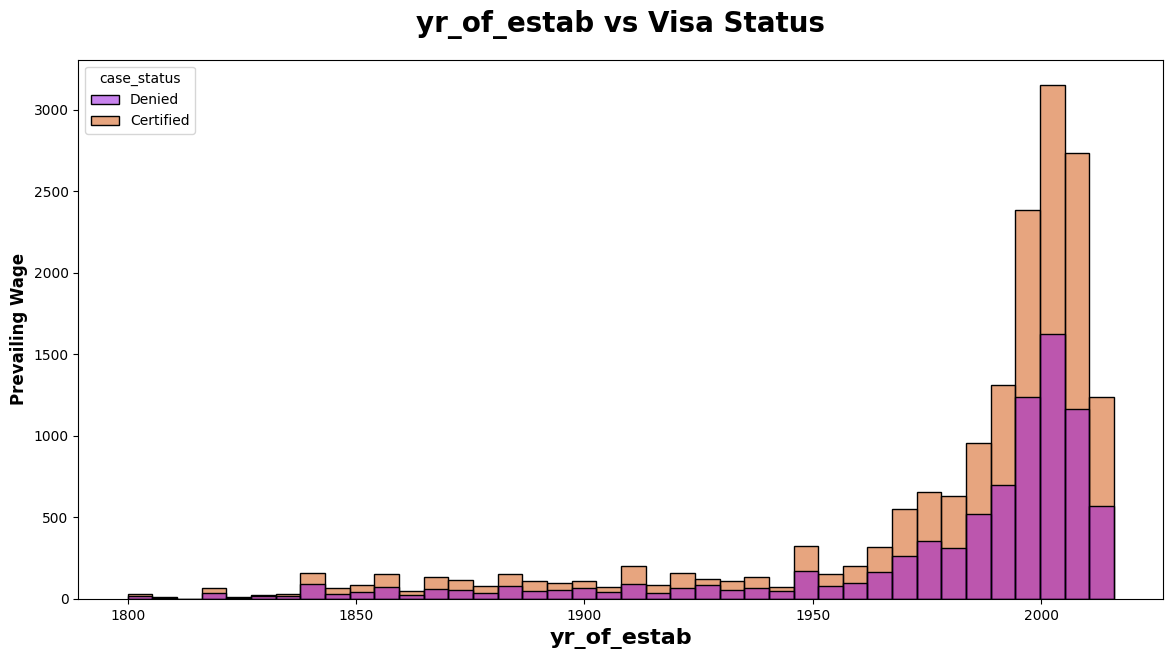

In [44]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

**Report**
* Each bins consists of 5 years.
* Many companies were established after year 2000.
* The most company establishment happened in year 2000-2005.

### Final Report 
* `case_id` column can be dropped as it is an ID.
* `requires_job_training` column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
* `no_of_employees`, `prevailing_wage` columns have outllier which should be handled.
* `continent` columns has few unique values with very less count, which can be made as **others**
* Target column `case_status` is imbalanced can be handled before model building.

In [ ]:
########################-------------Feature Engineering and Model Training in Next ipynb------------###########################